In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
abalone = fetch_ucirepo(id=1)  
X = abalone.data.features 
y = abalone.data.targets

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X = X.select_dtypes(include = 'number')

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

[2.81226512354917, 3.3600718347800065, 3.627106634332871, 3.785434241984177, 3.875760956411823, 3.9745868526058707, 4.038144268183179, 4.103693339229806, 4.162089244598919, 4.215612933789699]


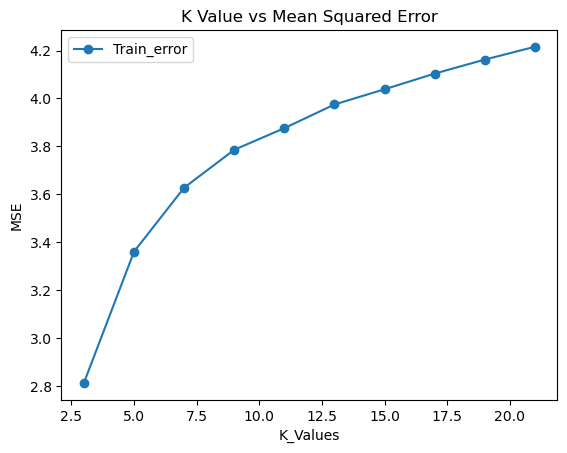

In [11]:
k_values = []
error = []
error_diff = []
for k in range(3,22,2):
    reg = KNeighborsRegressor(n_neighbors = k)
    regg = reg.fit(x_train,y_train)
    pred_train = regg.predict(x_train)
    mean_square_error = mean_squared_error(y_train,pred_train)
    k_values.append(k)
    error.append(mean_square_error)
print(error)
plt.plot(k_values,error,marker = 'o',label = "Train_error")
plt.title("K Value vs Mean Squared Error")
plt.xlabel("K_Values")
plt.ylabel("MSE")
plt.legend()
plt.show()

[5.532429558745348, 5.2829186602870815, 4.937286397812714, 4.76538779608955, 4.659565423702005, 4.662183969876278, 4.601759702286018, 4.642816344100263, 4.6669273283940145, 4.703202812225369, 4.6950348676296345, 4.694947368421053, 4.722635713863784, 4.717868338557993]


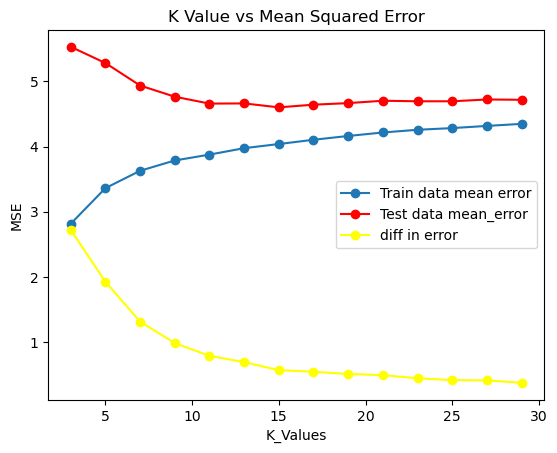

In [12]:
k_values = []
error = []
test_error = []
error_diff = []
for k in range(3,31,2):
    reg = KNeighborsRegressor(n_neighbors = k)
    regg = reg.fit(x_train,y_train)
    pred_train = regg.predict(x_train)
    pred_test = regg.predict(x_test)
    mean_square_error = mean_squared_error(y_train,pred_train)
    mean_test_error = mean_squared_error(y_test,pred_test)
    k_values.append(k)
    error.append(mean_square_error)
    test_error.append(mean_test_error)
diff = []
for i in range(len(error)):
    sub = test_error[i] - error[i]
    diff.append(sub)
    
print(test_error)
plt.plot(k_values,error,marker = 'o',label = "Train data mean error")
plt.plot(k_values,test_error,marker = 'o',color = 'red',label = "Test data mean_error")
plt.plot(k_values,diff,marker = 'o',color = 'yellow',label = "diff in error")
plt.title("K Value vs Mean Squared Error")
plt.xlabel("K_Values")
plt.ylabel("MSE")
plt.legend()
plt.show()

diff = []
for i in range(len(error)):
    sub = test_error[i] - error[i]
    diff.append(sub)
#diff

In [13]:
## Test_data prediction
k = 15
knn = KNeighborsRegressor (n_neighbors = k)
knr = knn.fit(x_train,y_train)
train_pred = knr.predict(x_train)
test_prediction = knr.predict(x_test)
error = mean_squared_error(y_test,test_prediction)
r_square = r2_score(y_test,test_prediction)
train_r = r2_score(y_train,train_pred)
print("error:",error)
print("R_Square:",r_square)
print("r_square_train:",train_r)

error: 4.601759702286018
R_Square: 0.576277359667076
r_square_train: 0.6069067131376189


#### The best K_Value is 15

In [20]:
from sklearn.model_selection import GridSearchCV
import numpy as np

knn_params = {"n_neighbors" : np.arange(1,21,1)}
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])})

In [21]:
knn_cv_model.best_params_["n_neighbors"]

18

In [22]:
k = 18
knn = KNeighborsRegressor (n_neighbors = k)
knr = knn.fit(x_train,y_train)
test_prediction = knr.predict(x_test)
error = mean_squared_error(y_test,test_prediction)
r_square = r2_score(y_test,test_prediction)
print("error:",error)
print("R_Square:",r_square)

error: 4.662443144899286
R_Square: 0.570689725763504


## Decision Tree Regression

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [25]:
X.columns,y.columns

(Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
        'Viscera_weight', 'Shell_weight'],
       dtype='object'),
 Index(['Rings'], dtype='object'))

In [26]:
dtr = DecisionTreeRegressor(max_depth = 3,random_state = 0)
dt = dtr.fit(x_train,y_train)

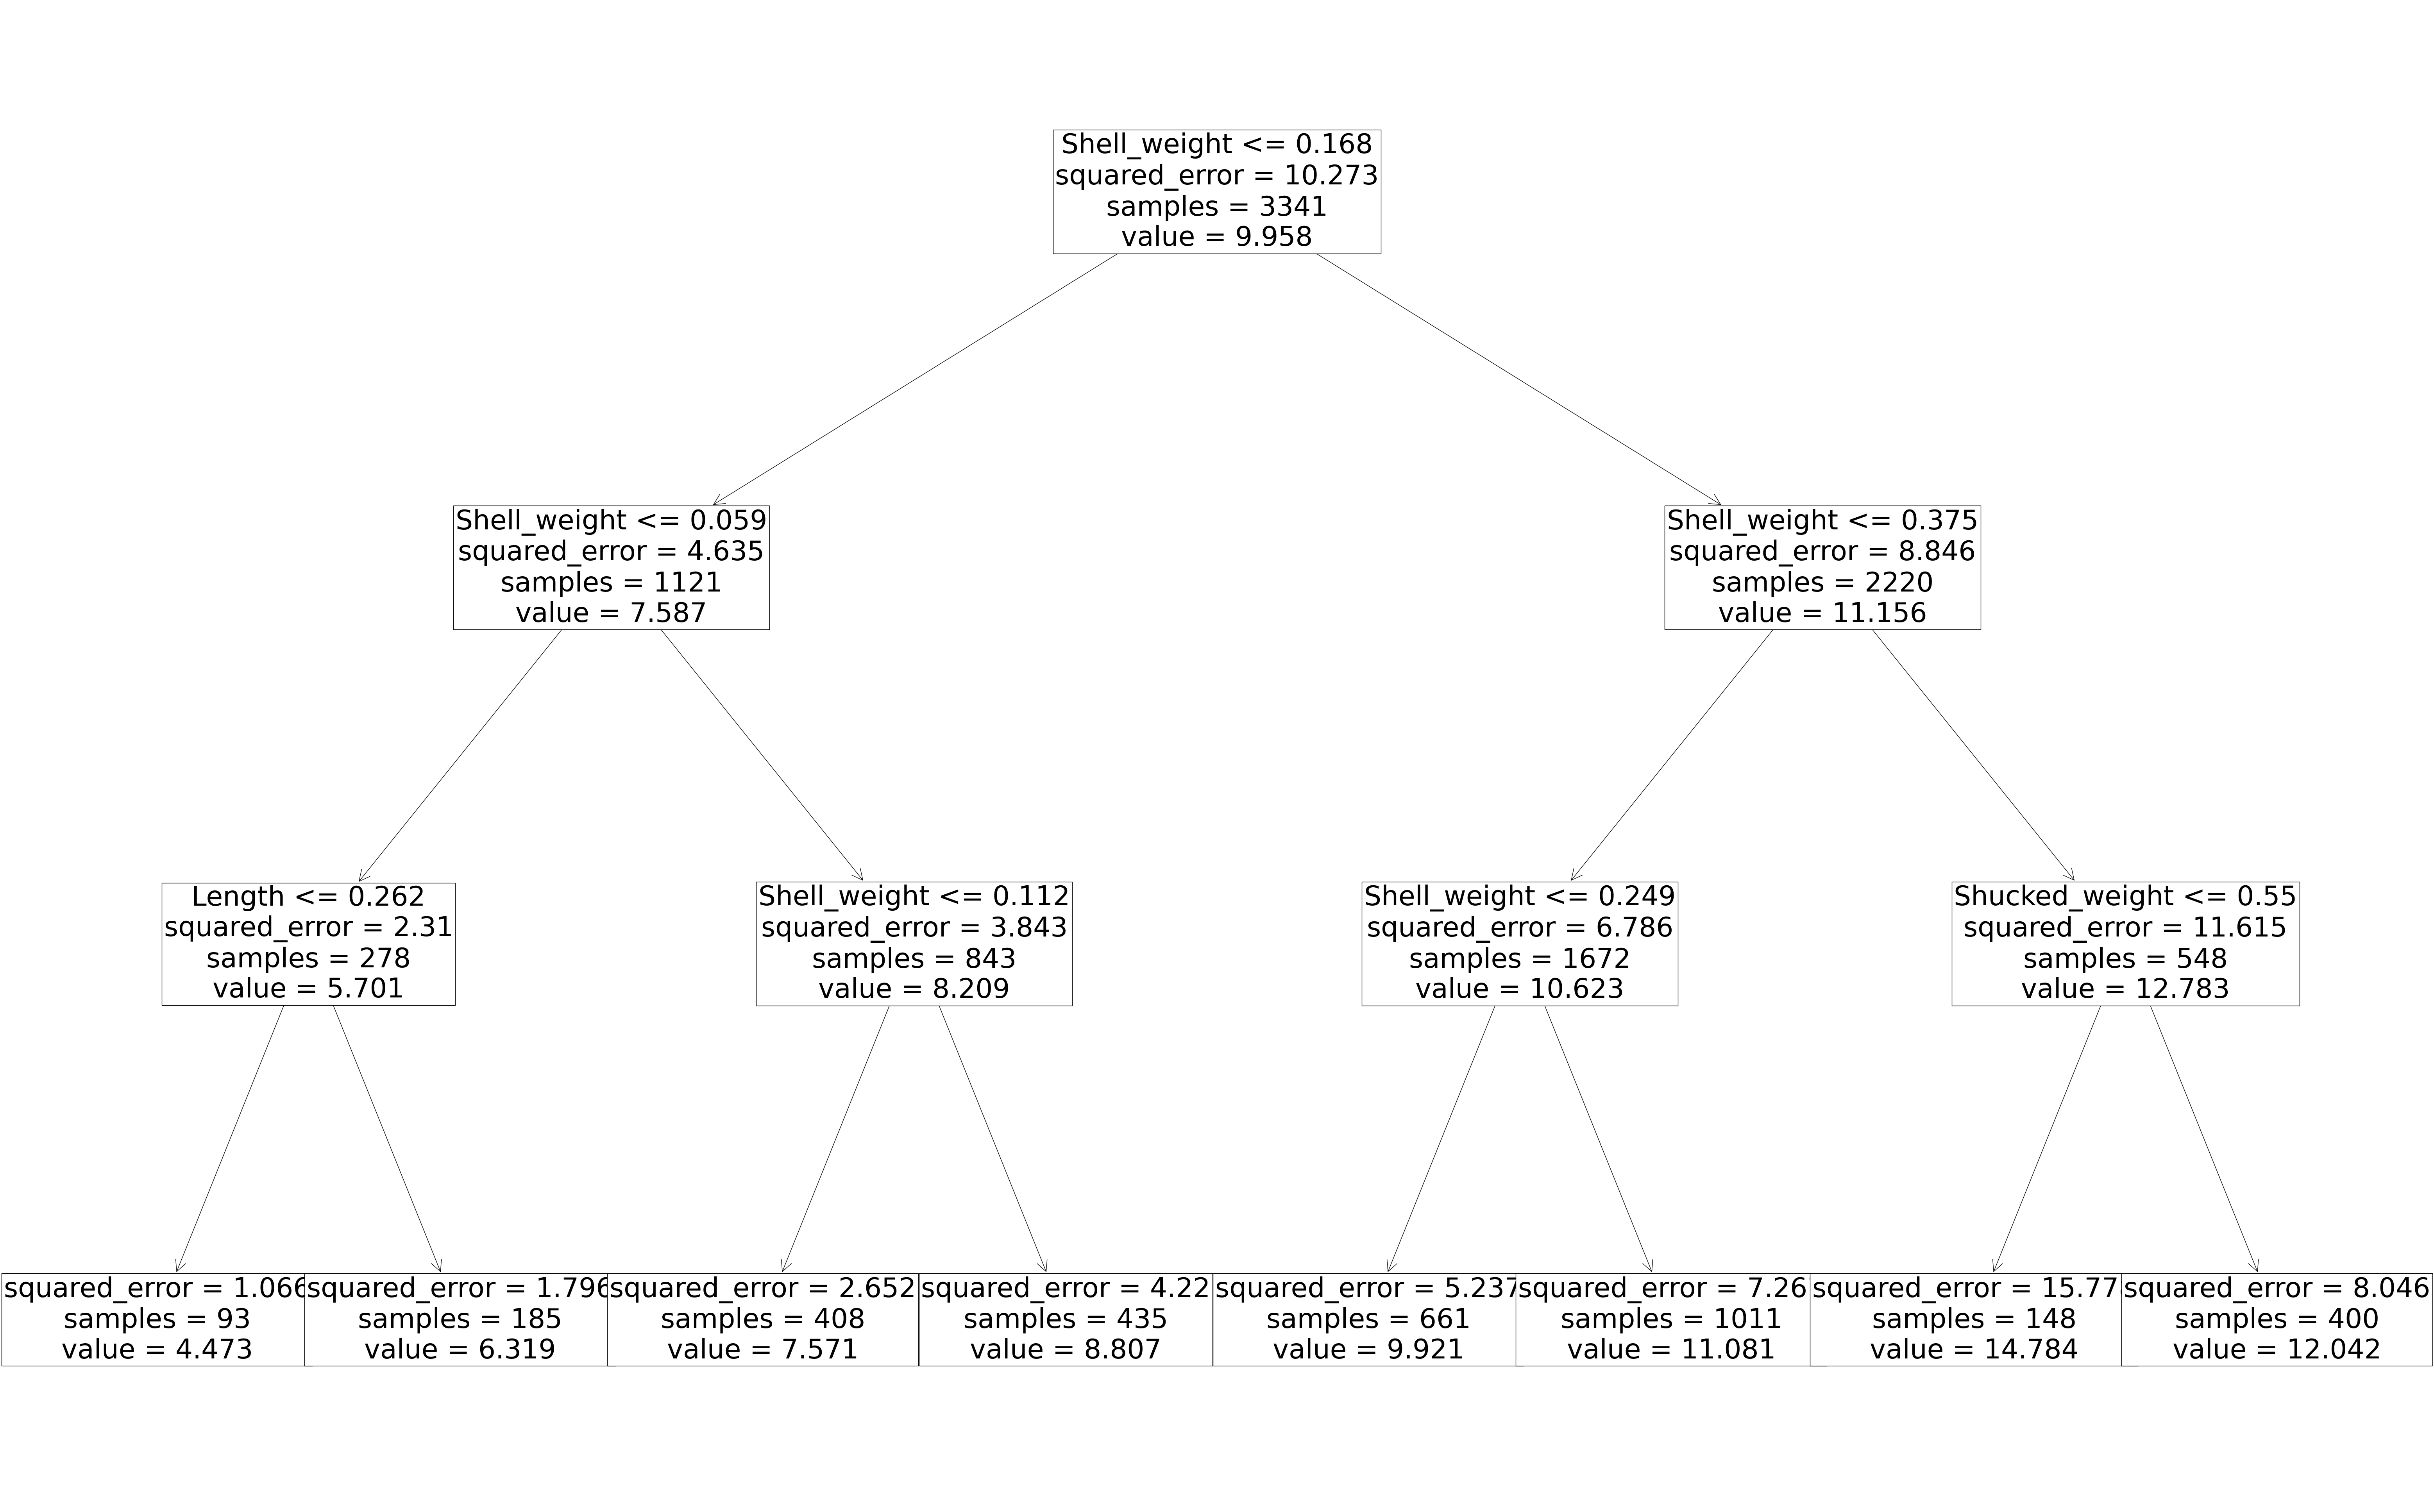

In [27]:
# Pass the list of column names directly
feature_names = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

plt.figure(figsize=(80, 50))
tree.plot_tree(dt, feature_names=feature_names,fontsize=50)
plt.show()


In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
train_predict = dt.predict(x_train)
test_predict = dt.predict(x_test)
train_mse = mean_squared_error(y_train,train_predict)
test_mse = mean_squared_error(y_test,test_predict)
train_mae = mean_absolute_error(y_train,train_predict)
test_mae = mean_absolute_error(y_test,test_predict)
print(f"The train data mse : {train_mse}")
print(f"The test data mse : {test_mse}")
print(f"The train data mae : {train_mae}")
print(f"The test data mae : {test_mae}")
print(f"The R^2 value is : {r2_score(y_test,test_predict)}")

The train data mse : 5.899940611819467
The test data mse : 6.189694429815185
The train data mae : 1.75632148787873
The test data mae : 1.7826319468437057
The R^2 value is : 0.4300628810860342


## Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [65]:
x = pd.DataFrame(X["Diameter"])
y1 = y["Rings"]
x.shape ,y1.shape

((4177, 1), (4177,))

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [69]:
lm = LinearRegression()
lm.fit(x_train,y_train)
train_predict = lm.predict(x_train)
test_predict = lm.predict(x_test)

In [71]:
Rsquare = lm.score(x_train,y_train)
test_rsquare = lm.score(x_test,y_test)
print(f"The Rsquare for train_data: {Rsquare}")
print(f"The Rsquare for test_data : {test_rsquare}")

The Rsquare for train_data: 0.33380197588161065
The Rsquare for test_data : 0.3188342875507705


In [73]:
new = [0.265]
pred_val=lm.intercept_+np.dot(lm.coef_,new)
np.round((pred_val),0)

array([7.])

## Error calculation

In [76]:
import warnings
warnings.filterwarnings('ignore')
error = y_test-test_predict
abs_error=np.abs(error)

## mae
mae = np.mean(abs_error)
print(f" The mae is  : {mae}")

## mse
mse = np.mean((error**2))
print(f" The mse is : {mse}")

##sse
sse = np.sum(error**2)
print(f" The sse is : {sse}")

## sst
sst =np.sum(( y_test - np.mean(y_test))**2)
print(f" The sst is : {sst}")

## rsquare
r = 1-(sse/sst)
print(f'The rsquare value is {r}')

 The mae is  : 1.949751927496324
 The mse is : 7.542631003700329
 The sse is : Rings    7882.049399
dtype: float64
 The sst is : Rings    11571.41244
dtype: float64
The rsquare value is Rings    0.318834
dtype: float64


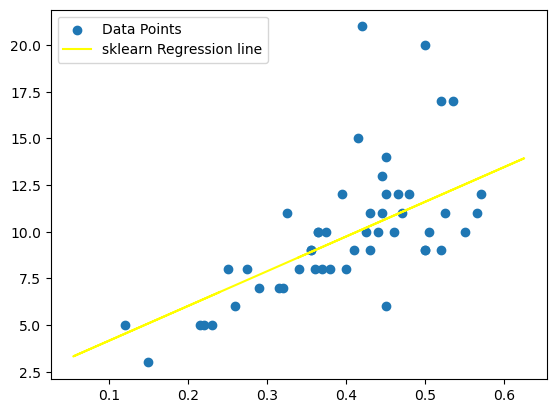

In [78]:
plt.scatter(x_test.head(50),y_test.head(50),label = "Data Points")
plt.plot(x_test,test_predict,label = "sklearn Regression line",c='yellow')
plt.legend()
plt.show()

In [80]:
import statsmodels.api as sm

In [82]:
x = pd.DataFrame(X["Diameter"])
y1 = y["Rings"]
x.shape ,y1.shape
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [84]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train,x_train).fit()
preds = model.predict(x_train)
yhat = model.predict(x_test)

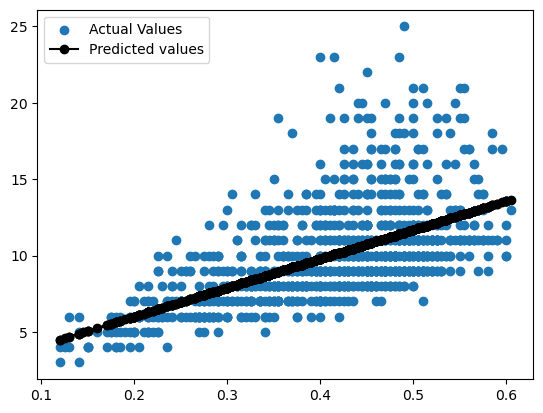

In [86]:
plt.scatter(x_test.iloc[:,1],y_test,label = "Actual Values")
plt.plot(x_test.iloc[:,1],yhat,label="Predicted values",marker = 'o',color='black')
plt.legend()
plt.show()

In [90]:
print(f'r square with Decision tree is 0.430')
print(f'r square with KNN Regressor is 0.576')
print(f'r square with Linear Regression is 0.318834')

r square with Decision tree is 0.430
r square with KNN Regressor is 0.576
r square with Linear Regression is 0.318834
